## Práctica 1 - Operadores puntuales e histograma


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Carga de imágenes y visualización

In [386]:
def cargar(nombre):
    img = Image.open(nombre).convert(mode='L')
    return np.array(img)


In [387]:
def mostrar(imagen):
    plt.figure(figsize=(7, 7))
    plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)


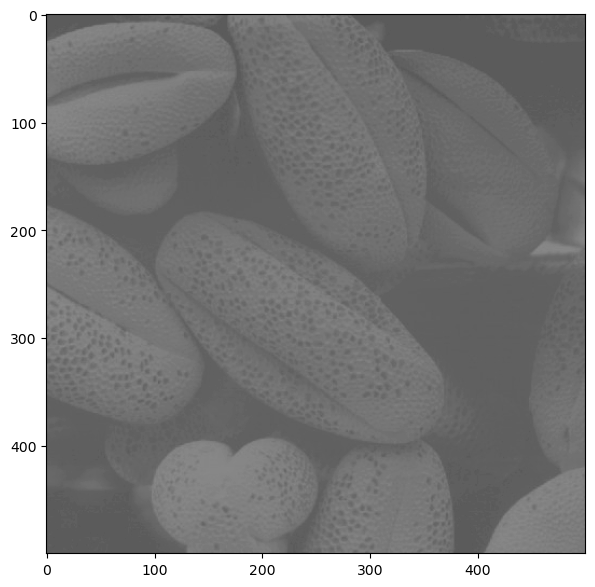

In [232]:
#prueba
r = cargar("seeds.jpg")
mostrar(r)

### Ejercicio 1
Implementar la compresión del rango dinámico:

In [427]:
#genero imagen con ruido y valores bajos (0 <= r <= 15)
random = np.uint8(np.random.randint(0, 16, size=(500, 500)))


In [428]:
def pasarALog(imagen):
    c = 255 / np.log(1 + np.max(imagen))
    resultado = np.uint8(c * np.log(1 + imagen))
    return resultado

In [429]:
s1 = pasarALog(random)

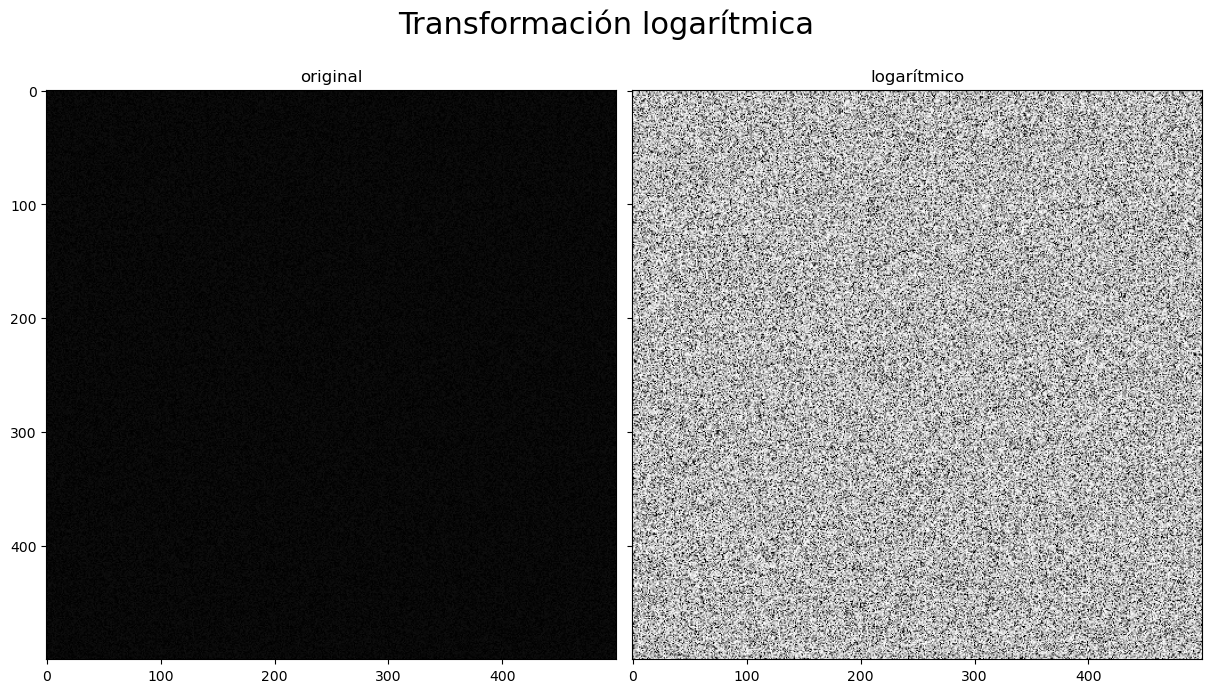

In [430]:
fig = plt.figure(layout='constrained', figsize=(12, 7))
ax = fig.subplots(1, 2, sharey=True)

fig.suptitle('Transformación logarítmica', size=22)

ax[0].set_title('original')
ax[0].imshow(random, cmap='gray', vmin=0, vmax=255)

ax[1].set_title('logarítmico')
ax[1].imshow(s1, cmap='gray', vmin=0, vmax=255)


### Ejercicio 2 - Negativo de la imagen

In [424]:
def negativo(imagen):
    return np.uint8(-1 * imagen + 255)

In [425]:
r2 = cargar("manografia.jpg")
s2 = negativo(r2)

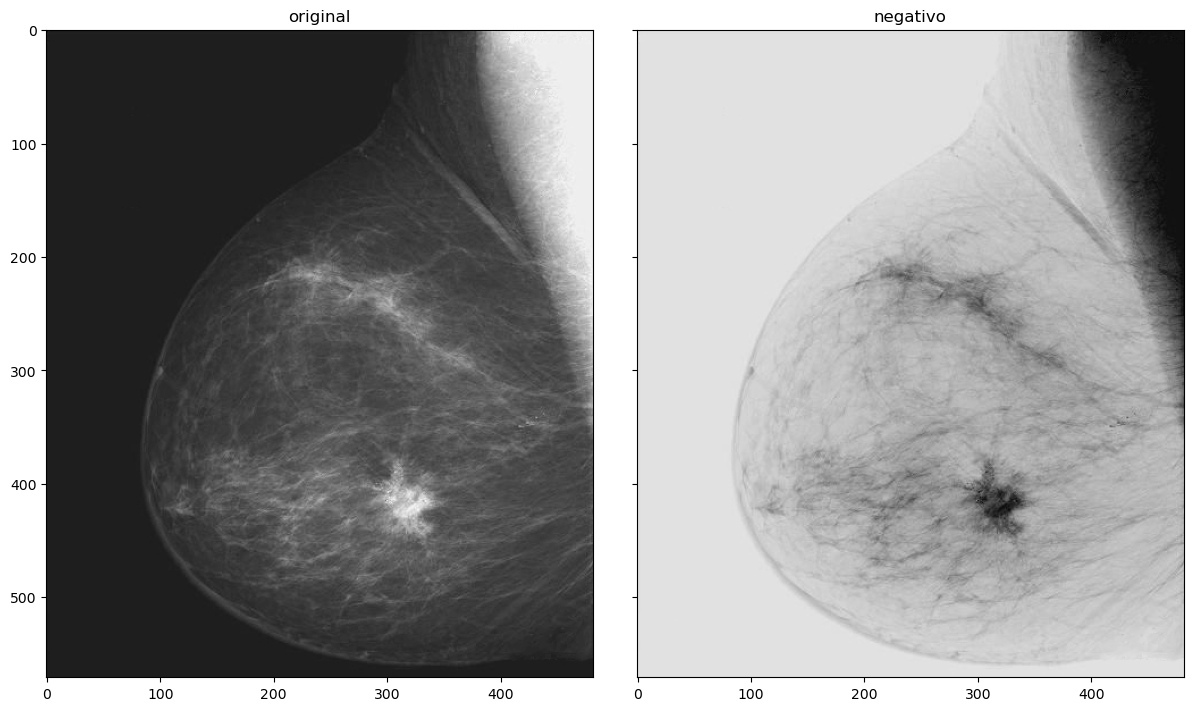

In [426]:
fig = plt.figure(layout='constrained', figsize=(12, 7))
ax = fig.subplots(1, 2, sharey=True)

ax[0].set_title('original')
ax[0].imshow(r2, cmap='gray', vmin=0, vmax=255)

ax[1].set_title('negativo')
ax[1].imshow(s2, cmap='gray', vmin=0, vmax=255)

### Ejercicio 3 - Histograma

In [440]:
def histograma(imagen, log=False):
    hist = np.histogram(imagen, 256, range=(0, 256))
    fig = plt.figure(layout='constrained', figsize=(12, 7))
    ax = fig.subplots(1, 2, sharey=False)
    ax[0].set_title('imagen')
    ax[0].imshow(imagen, cmap='gray', vmin=0, vmax=255)
    ax[1].set_title('histograma')
    ax[1].set_xticks(range(10, 256, 10), minor=True)
    if log: ax[1].set_yscale('log')
    #ax[1].bar(range(0, 256), np.cumsum(hist[0]))
    ax[1].bar(range(0, 256), hist[0])

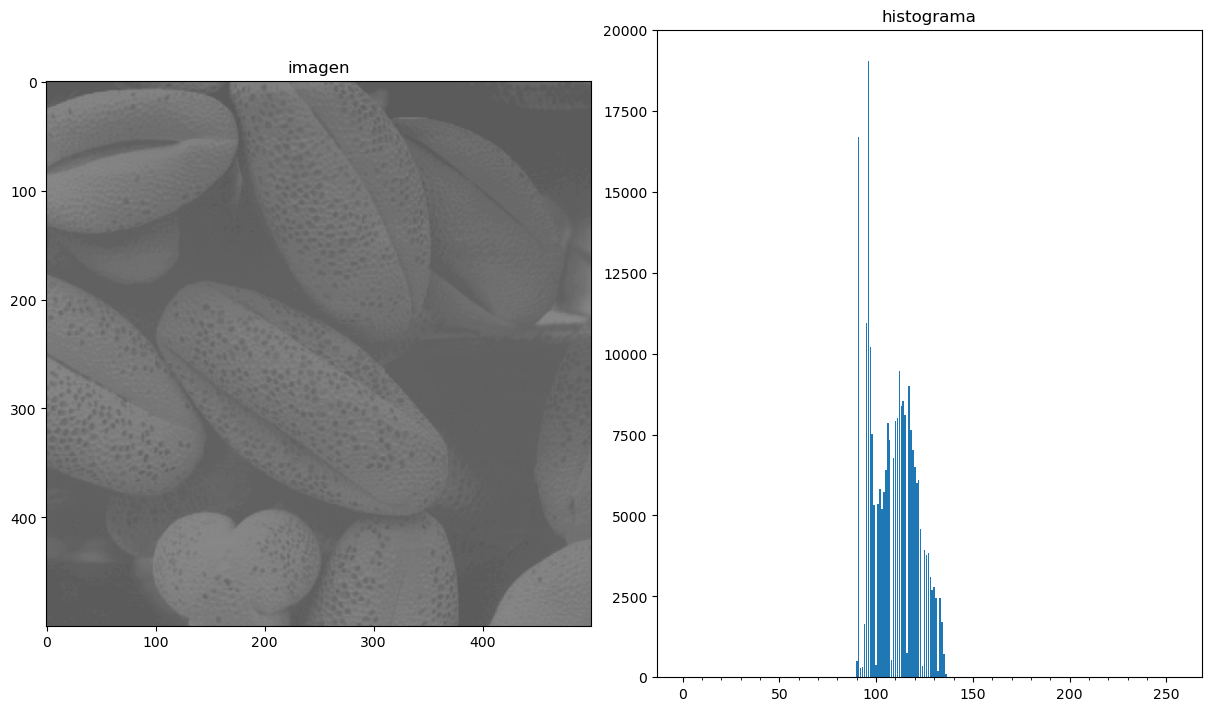

In [441]:
histograma(r, False)

### Ejercicio 4 - Aumento del contraste

In [371]:
def mejoraContraste(imagen, x1, x2, pendiente=0.25, muestra=False):
    bajos = np.less(imagen, x1)
    altos = np.greater_equal(imagen, x2)
    medios = np.logical_and(np.logical_not(bajos), np.logical_not(altos))

    y1 = (pendiente * x1)
    b_altos = 255 * (1 - pendiente)
    y2 = (b_altos + x2 * pendiente)

    #recta del medio:
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    resultado = np.uint8(
        bajos * (pendiente * imagen) + medios * (m * imagen + b) + altos * (pendiente * imagen + b_altos))

    if muestra:
        rango1 = np.arange(0, x1)
        rango2 = np.arange(x1, x2 + 1)
        rango3 = np.arange(x2, 256)

        fig = plt.figure(layout='constrained', figsize=(12, 7))
        ax = fig.subplots(1, 2, sharey=False)
        ax[0].set_title('resultado')
        ax[0].imshow(resultado, cmap='gray', vmin=0, vmax=255)
        ax[1].set_title('curva de ajuste')
        ax[1].set_xticks(range(10, 256, 10), minor=True)
        ax[1].plot(rango1, rango1 * pendiente, color="blue")
        ax[1].plot(rango2, m * rango2 + b, color="blue")
        ax[1].plot(rango3, pendiente * rango3 + b_altos, color="blue")
        ax[1].grid()

    return resultado


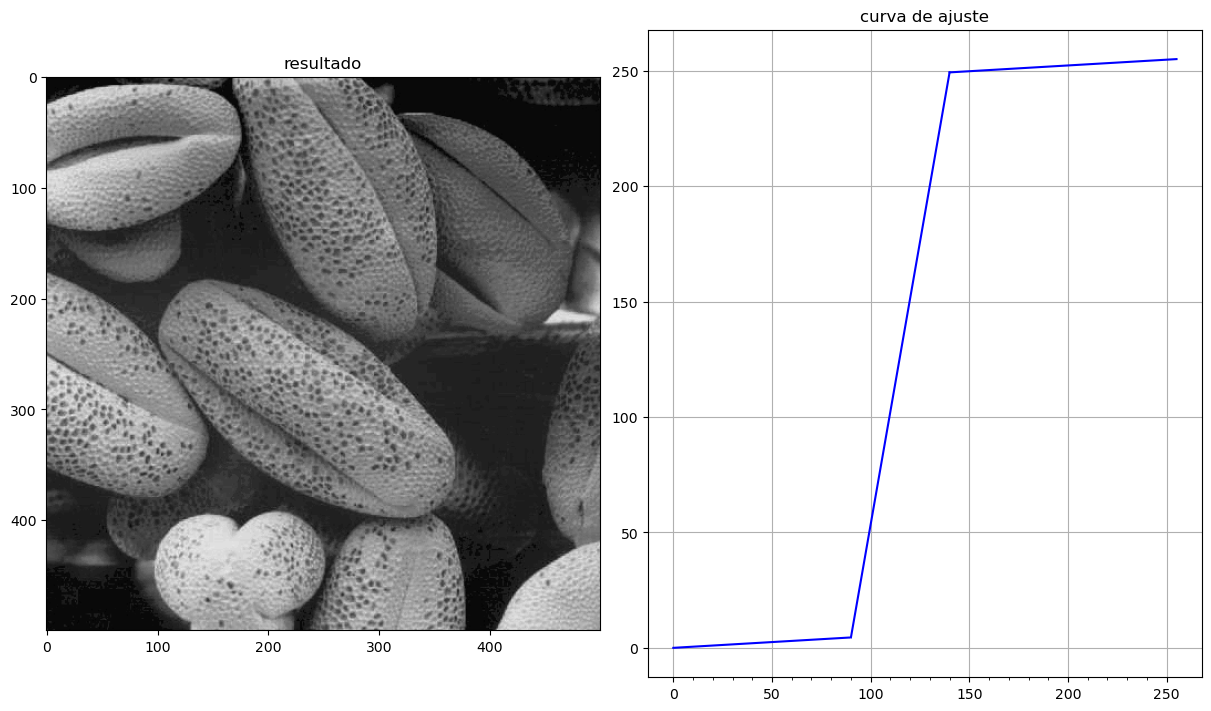

In [383]:
s4 = mejoraContraste(r, 90, 140, 0.05, True)

Otra imagen:

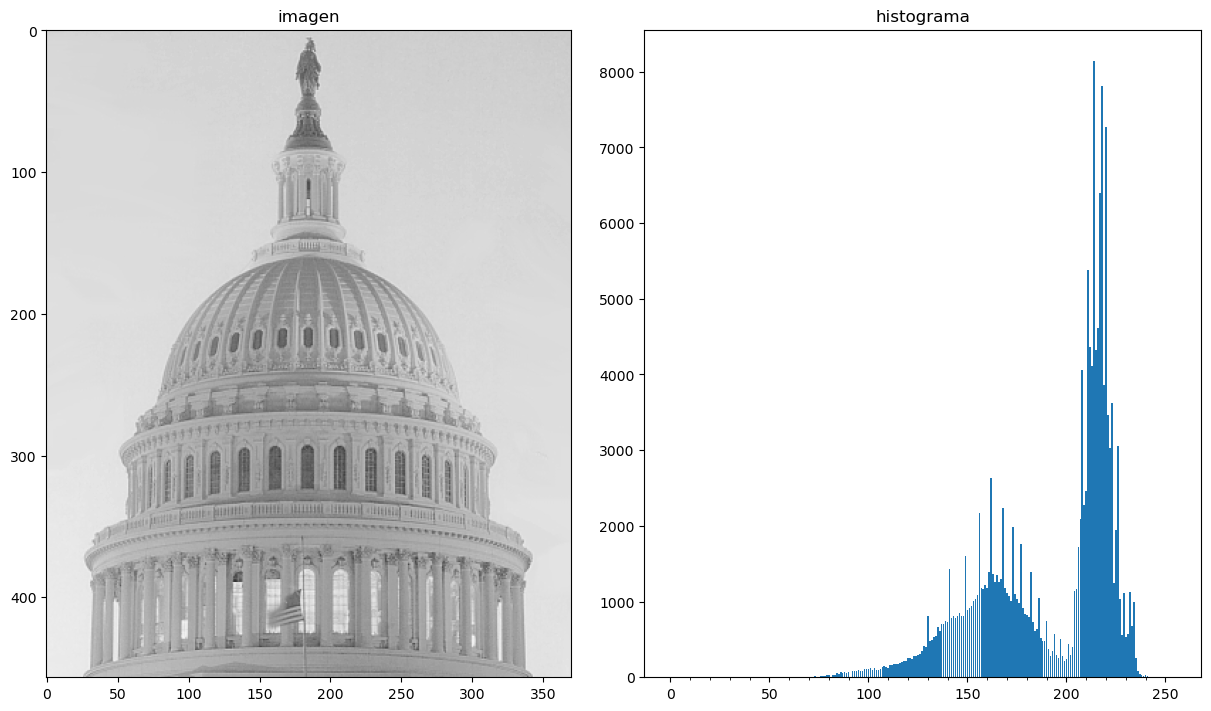

In [478]:
r4b = cargar("cupula.jpg")
histograma(r4b)

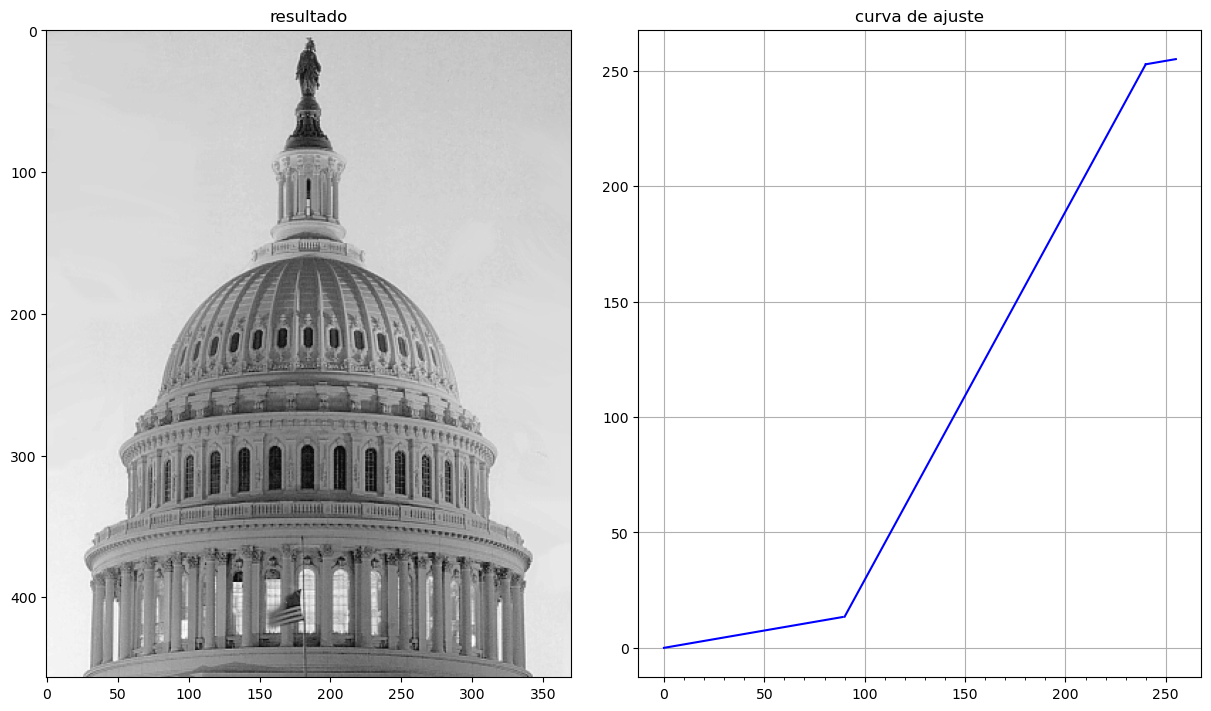

In [486]:
s4 = mejoraContraste(r4b, 90, 240, 0.15, True)

### Ejercicio 5 - Umbral

In [422]:
# valor entre 0 y 255
def umbral(imagen, valor):
    return np.uint8(np.greater(imagen, valor) * 255)


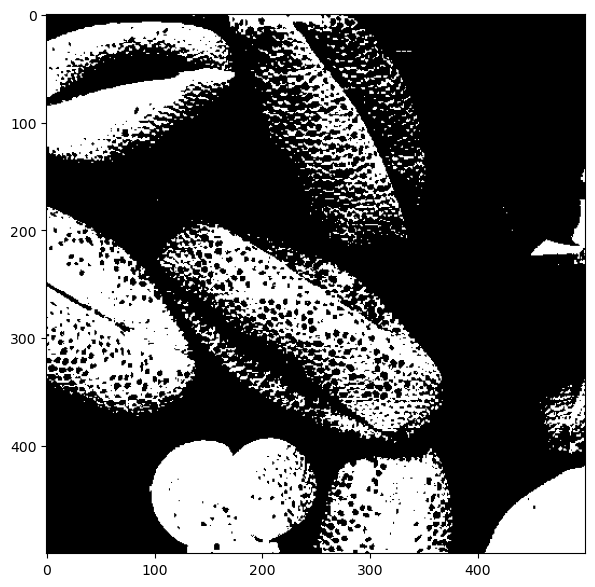

In [423]:
s5 = umbral(r, 115)
mostrar(s5)

### Ejercicio 6 - Ecualización de histograma

In [442]:
def eqHist(imagen):
    hist = np.histogram(imagen, 256, range=(0, 256))
    acumulado = np.cumsum(hist[0])
    normalizado = 255 * ((acumulado - acumulado.min()) / (acumulado.max() - acumulado.min()))
    resultado = np.uint8(normalizado[imagen])
    return resultado


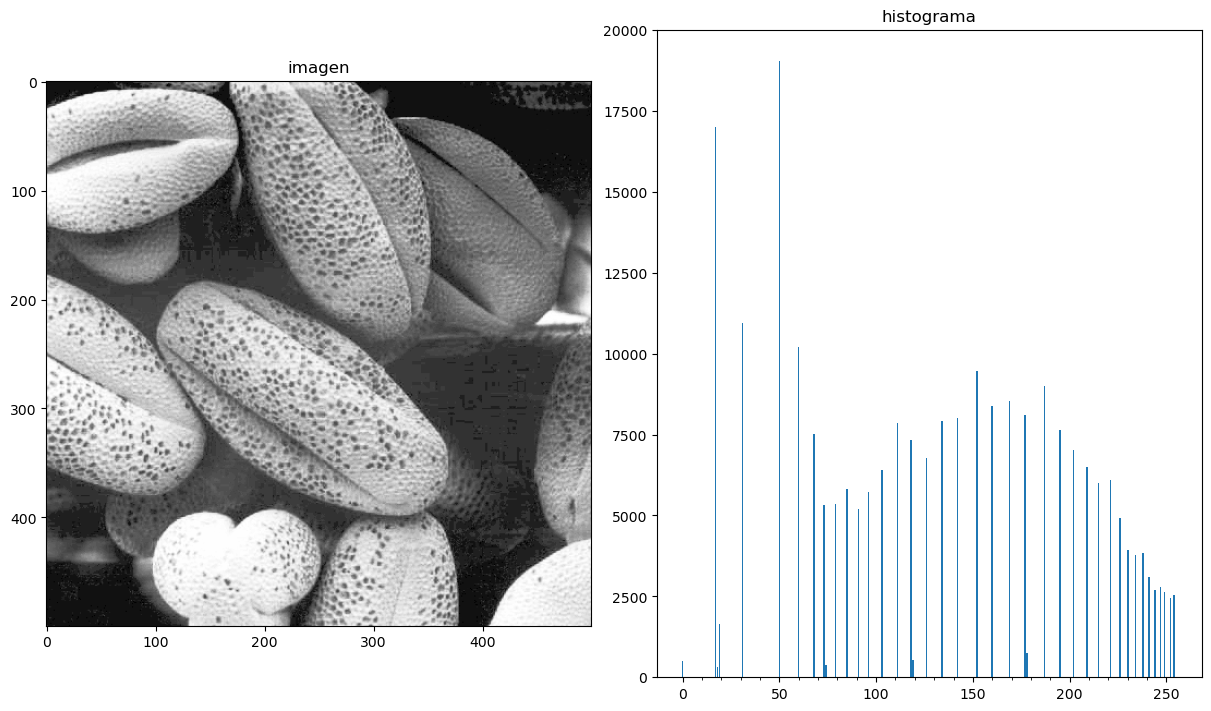

In [443]:
s6 = eqHist(r)
histograma(s6)

Volvemos a aplicar la ecualización:

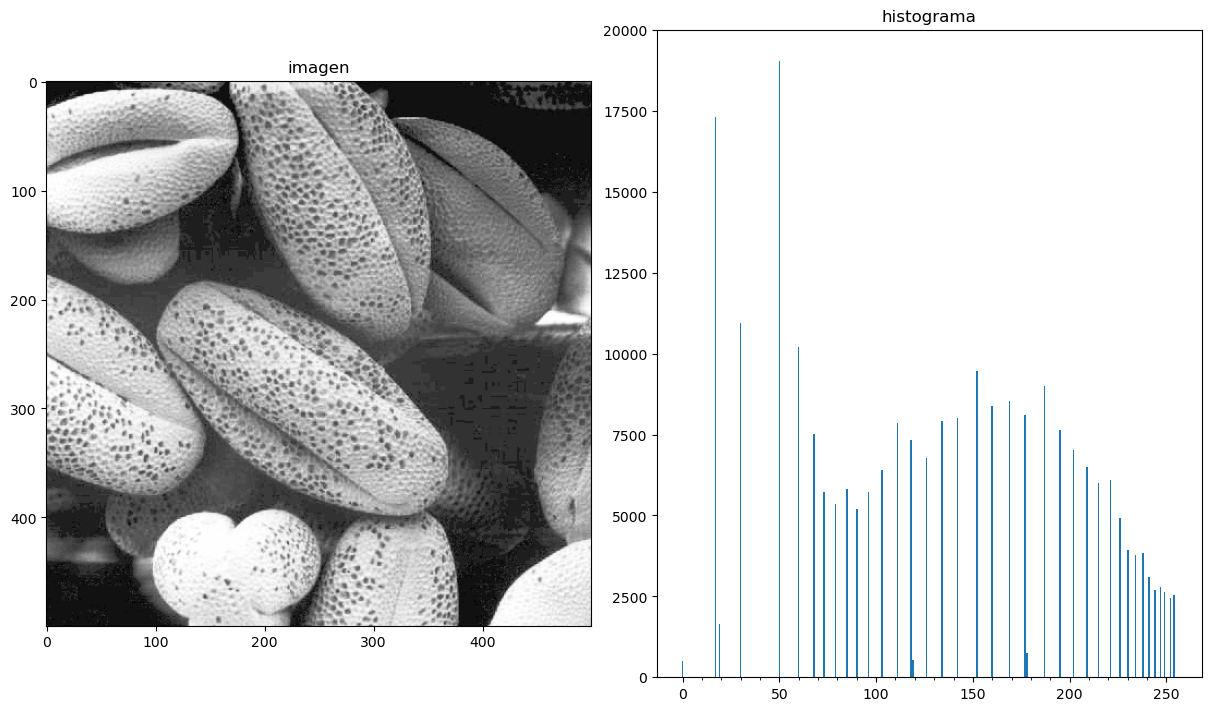

In [444]:
s6b = eqHist(s6)
histograma(s6b)

El resultado es igual porque el histograma de origen ya tiene una distribución uniforme (porque fue ecualizado previamente) entonces la nueva ecualización no modifica nada.


### Ejercicio 7 - Modificación de histograma

In [451]:
def aplicaHistograma(imagen, histograma):
    acumulado = np.cumsum(histograma)
    normalizado = 255 * ((acumulado - acumulado.min()) / (acumulado.max() - acumulado.min()))
    resultado = np.uint8(normalizado[imagen])
    return resultado

In [452]:
def modHistograma(imagen, _lambda, gamma):
    hi, _ = np.histogram(imagen, 256, range=(0, 256))
    imagen_ecualizada = eqHist(imagen)
    u, _ = np.histogram(imagen_ecualizada, 256, range=(0, 256))
    
    I = np.eye(256)
    D = I * -1
    D = np.delete(D, (255), axis= 0)
    unos = np.eye(255)
    unos = np.column_stack((np.zeros(255), unos))
    D = D + unos
    
    hist = np.linalg.inv(I * (1 + _lambda) + gamma * D.T @ D) @ (hi + _lambda * u)
    
    return hist

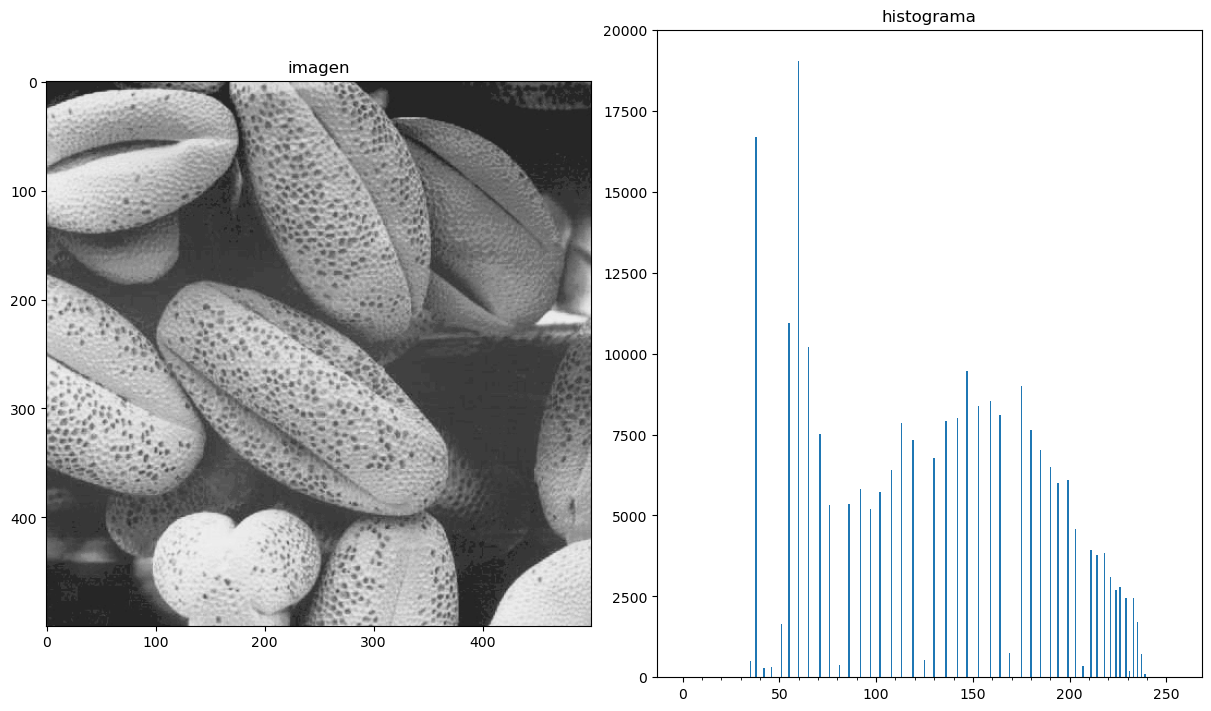

In [472]:
histograma_a = modHistograma(r, 0, 100)
s7a = aplicaHistograma(r, histograma_a)
histograma(s7a)

Otra imagen:

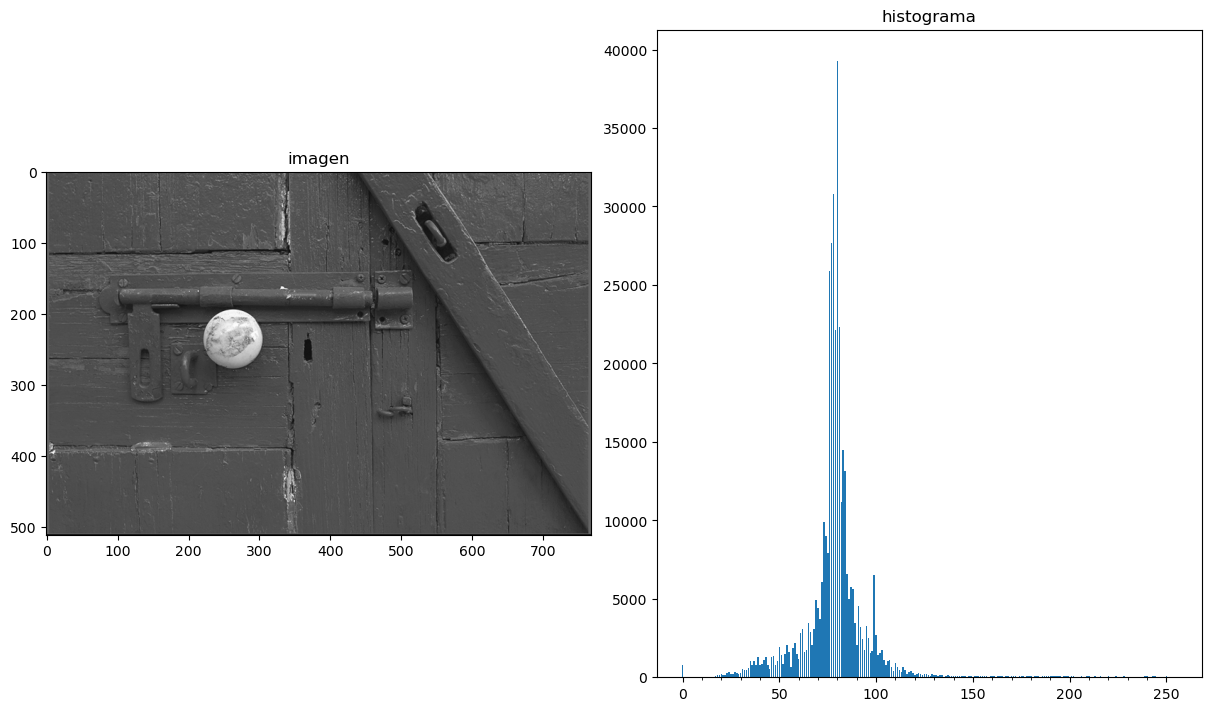

In [497]:
r7b = cargar("kodim02.png")
histograma(r7b)

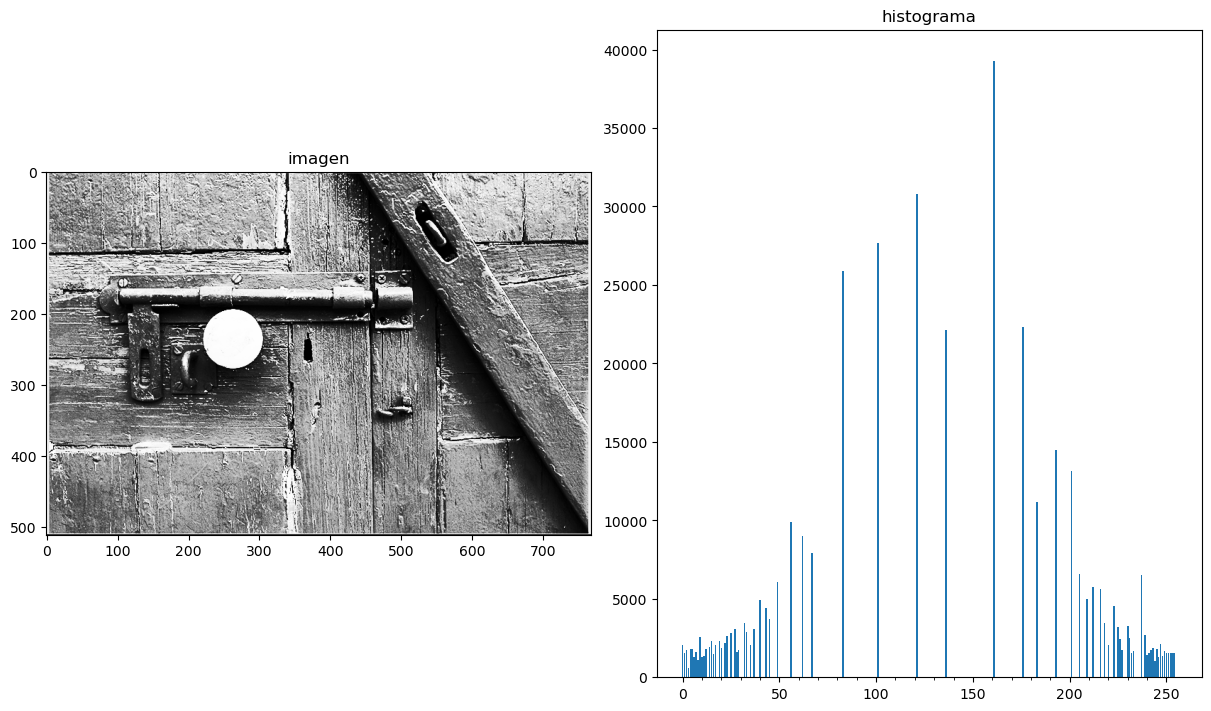

In [496]:
#ecualizacion normal
histograma_b = modHistograma(r7b, 0, 0)
s7b = aplicaHistograma(r7b, histograma_b)
histograma(s7b)

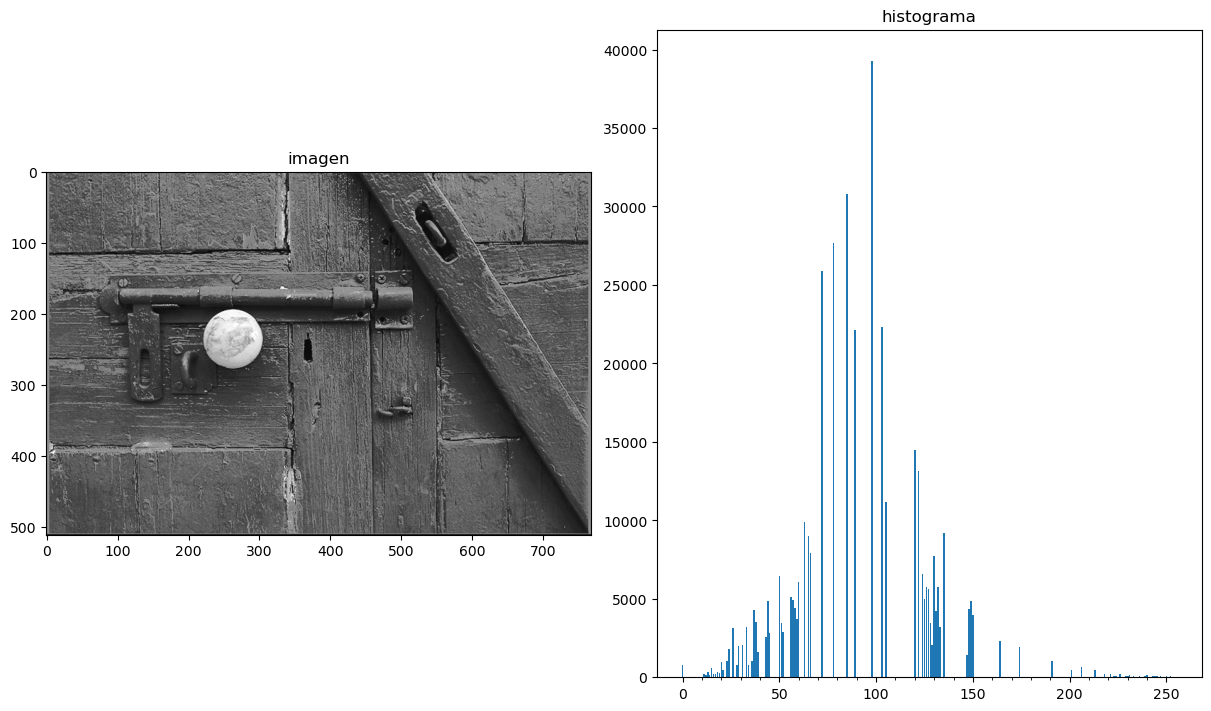

In [495]:
#lambda = 2
histograma_c = modHistograma(r7b, 2, 0)
s7c = aplicaHistograma(r7b, histograma_c)
histograma(s7c)

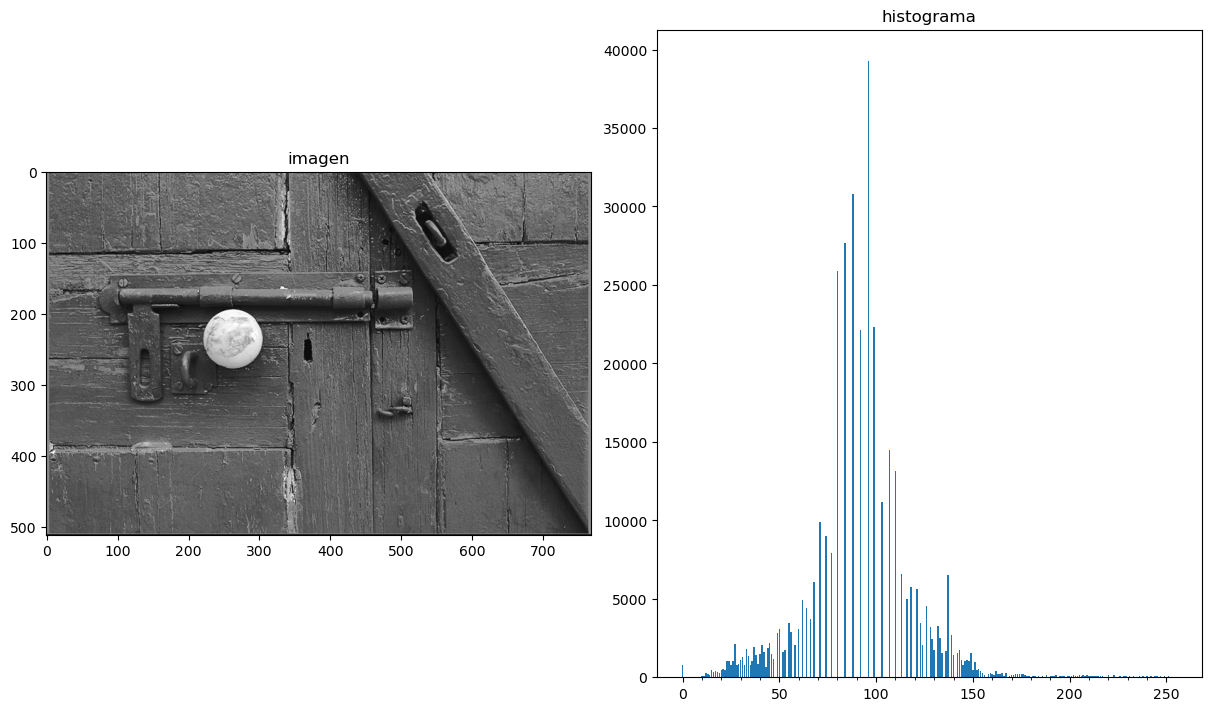

In [494]:
#lambda = 2 y gamma = 10 (mas suavizado)
histograma_d = modHistograma(r7b, 2, 100)
s7d = aplicaHistograma(r7b, histograma_d)
histograma(s7d)